Pascal VOC挑战赛是视觉对象的分类识别和检测的一个基准测试，提供了检测算法和学习性能的标准图像注释数据集和评估系统。

Pascal Voc官网为[链接](http://host.robots.ox.ac.uk/pascal/VOC/)，挑战赛的目标是从现实场景中的多个视觉对象类别中识别对象（即非预先分割的对象）。数据共包含20个类别，分别是

- 人
- 鸟，猫，牛，狗，马，绵羊
- 飞机，自行车，船，巴士，汽车，摩托车，火车
- 瓶子，椅子，餐桌，盆栽，沙发，电视及显示器

挑战赛共有五个主要任务：

- 分类
- 检测
- 分割
- 动作分类
- 大规模识别

Pascal Voc 2012数据集国内下载链接[链接](http://www.functionweb.tk/?/Pascal%20VOC/2012/VOCtrainval_11-May-2012.tar)

解压后得到VOCdevkit文件夹，文件夹内结构如下：

```VOC2012
 VOC2012
    ├── Annotations
    ├── ImageSets
    │   ├── Action
    │   ├── Layout
    │   ├── Main
    │   └── Segmentation
    ├── JPEGImages
    ├── SegmentationClass
    └── SegmentationObject
```

- Annotations，注释文件，格式为xml，与JPEGImages文件夹内的图片一一对应
- ImageSets，存放txt文件，文件每一行对应一个样本
- JPEGImages，存放源图片
- SegmentationClass，语义分割有关
- SegmentationObject，实例分割有关

VOC2012数据集中一共有2913张样本，其中1464张用于训练，1449张用于验证。但事实上数据仍然比较少。因此又有了一个VOC的增强数据集SBD。SBD数据集下载链接为[链接](http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/semantic_contours/benchmark.tgz),同时还有一个SBD数据集的注解，下载地址为[链接](https://pan.baidu.com/s/1-kYEZtOo99VJGHrKlOK5dQ)，提取码`jgx7`。注解文件在VOC2012文件夹下边的SegmentationClass_aug压缩包内。对应合并后的12031个样本。

SBD数据集共有8498个训练样本，2857个验证样本。将VOC数据集和SBD所有样本加在一块一共得到12031个样本。使用voc的验证集作为新数据集的验证集，剩余10582个样本用来训练

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'

Using TensorFlow backend.
/home/possibleit/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/possibleit/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/possibleit/anaconda3/envs/gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/possibleit/

In [9]:
palette = {
               (128, 0, 0): 1,
               (0, 128, 0): 2,
               (128, 128, 0): 3,
               (0, 0, 128): 4,
               (128, 0, 128): 5,
               (0, 128, 128): 6,
               (128, 128, 128): 7,
               (64, 0, 0): 8,
               (192, 0, 0): 9,
               (64, 128, 0): 10,
               (192, 128, 0): 11,
               (64, 0, 128): 12,
               (192, 0, 128): 13,
               (64, 128, 128): 14,
               (192, 128, 128): 15,
               (0, 64, 0): 16,
               (128, 64, 0): 17,
               (0, 192, 0): 18,
               (128, 192, 0): 19,
               (0, 64, 128): 20}

COLOR_DICT = [list(key) for key in palette]
COLOR_DICT

[[128, 0, 0],
 [0, 128, 0],
 [128, 128, 0],
 [0, 0, 128],
 [128, 0, 128],
 [0, 128, 128],
 [128, 128, 128],
 [64, 0, 0],
 [192, 0, 0],
 [64, 128, 0],
 [192, 128, 0],
 [64, 0, 128],
 [192, 0, 128],
 [64, 128, 128],
 [192, 128, 128],
 [0, 64, 0],
 [128, 64, 0],
 [0, 192, 0],
 [128, 192, 0],
 [0, 64, 128]]

In [3]:
target_size = (512, 512)
flag_multi_class = True

train_path = '/home/possibleit/文档/dataset/voc2012/VOC2012/SegmentationClass_aug/train'
val_path = '/home/possibleit/文档/dataset/voc2012/VOC2012/SegmentationClass_aug/val'
img_folder = 'jpg'
label_folder = 'png'
image_color_mode = 'rgb'
label_color_mode = 'rgb'
num_class = 21
data_gen_args = dict(
    rotation_range=0.2,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
def adjustData(img, label):
    img = img / 255.
    label = label[:, :, :, 0] if (len(label.shape) == 4) else label[:, :, 0]
    new_label = np.zeros(label.shape + (num_class,))
    for i in range(num_class):
        new_label[label == i, i] = 1
    label = new_label
    return (img, label)

In [5]:
def trainGenerator(batch_size, image_save_prefix="image", label_save_prefix="label",
                   save_to_dir=None, seed=7):
    image_datagen = ImageDataGenerator(**data_gen_args)
    label_datagen = ImageDataGenerator(**data_gen_args)

    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes=[img_folder],
        class_mode=None,
        color_mode=image_color_mode,
        target_size=target_size,
        batch_size=batch_size,
        save_to_dir=save_to_dir,
        save_prefix=image_save_prefix,
        seed=seed
    )

    label_generator = label_datagen.flow_from_directory(
        train_path,
        classes=[label_folder],
        class_mode=None,
        color_mode=label_color_mode,
        target_size=target_size,
        batch_size=batch_size,
        save_to_dir=save_to_dir,
        save_prefix=image_save_prefix,
        seed=seed
    )

    train_generator = zip(image_generator, label_generator)
    for (img, label) in train_generator:
        img, label = adjustData(img, label)
        yield (img, label)

In [6]:
def show_label(y):
    y = np.squeeze(y)
    empty = np.empty([512, 512, 3], dtype=int)
    for i in range(512):
        for j in range(512):
            for k in range(20):
                if y[i][j][k] == 1:
                    empty[i][j] = COLOR_DICT[k]
                    break

    plt.imshow(empty)

Found 10582 images belonging to 1 classes.
Found 10582 images belonging to 1 classes.


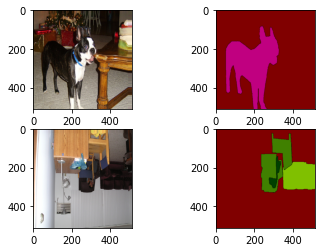

In [7]:
it = trainGenerator(batch_size=1)
# (x, y) = trainGenerator(batch_size=1).__next__()
(x, y) = next(it)
(m, n) = next(it)
plt.subplot(2,2,1)
plt.imshow(np.squeeze(x))
plt.subplot(2,2,2)
show_label(y)
plt.subplot(2,2,3)
plt.imshow(np.squeeze(m))
plt.subplot(2,2,4)
show_label(n)
plt.show()

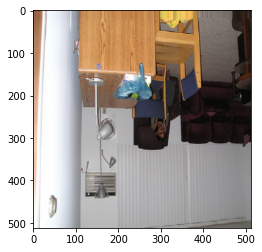

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


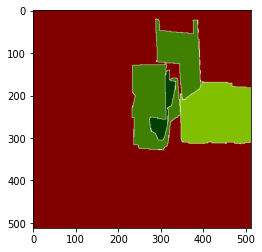

In [8]:
plt.imshow(np.squeeze(m))
plt.show()
show_label(n)
plt.show()